In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data/gold.csv') #import du dataset

### Analyse

In [34]:
df.Emotion.value_counts()

Emotion
happy       7028
sadness     6265
anger       2992
fear        2651
love        1641
surprise     879
Name: count, dtype: int64

1. Nombre de textes par émotion

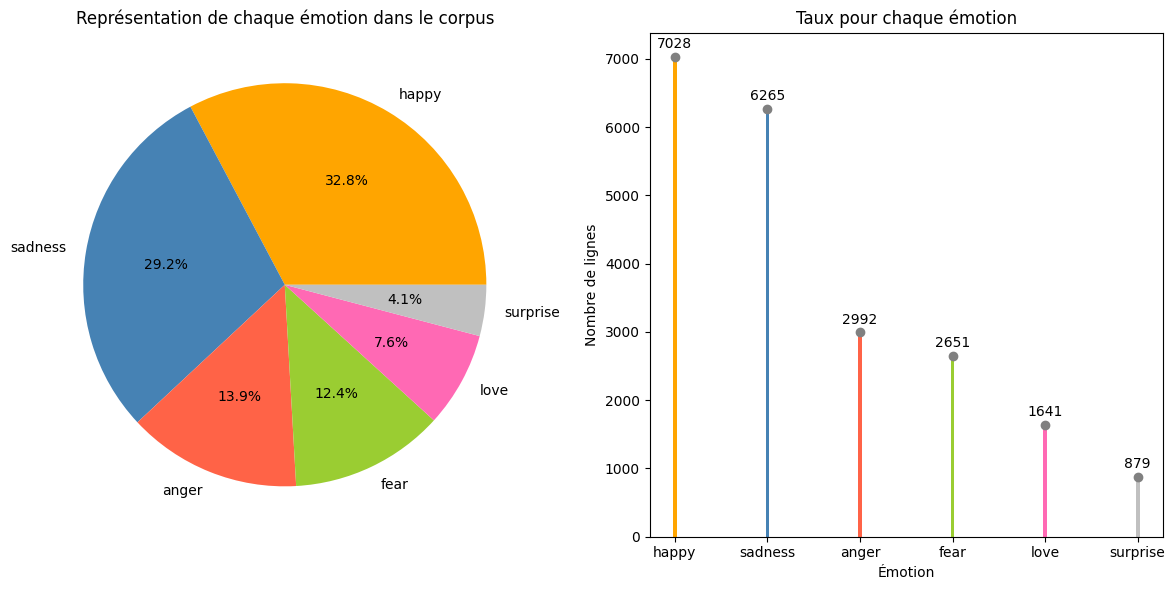

In [35]:
# Obtenir les émotions triées par ordre croissant des fréquences
emotion_counts = df['Emotion'].value_counts(ascending=False)
colors = ['orange', 'steelblue', 'tomato', 'yellowgreen', 'hotpink', 'silver'] 

# Créer la figure avec les sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Tracer le graphique en camembert avec les labels triés
ax1.pie(
    x=emotion_counts,
    labels=emotion_counts.index,
    autopct='%1.1f%%',
    # startangle=-45,
    colors=colors
                                              
)
ax1.set_title('Représentation de chaque émotion dans le corpus')

# Tracer le graphique en points
ax2.plot(
    emotion_counts.index, emotion_counts, 'o', color='grey'
)

# Tracer les barres
bars = ax2.bar(
    emotion_counts.index, emotion_counts, width=0.04,
    color=colors
)
ax2.set_title('Taux pour chaque émotion')
ax2.set(xlabel='Émotion', ylabel='Nombre de lignes')

# Ajouter les valeurs annotées au-dessus de chaque barre
ax2.bar_label(bars, labels=emotion_counts.values, label_type='edge', padding=4)

plt.tight_layout()
plt.show()


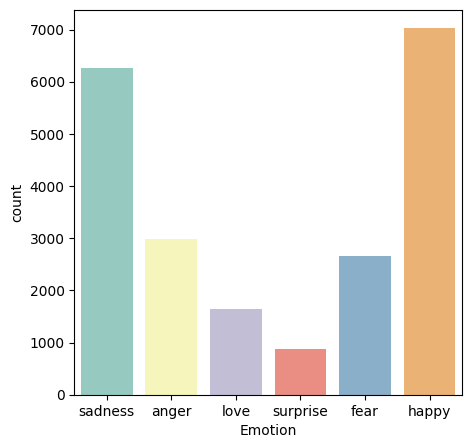

In [36]:
plt.figure(figsize = (5,5))
#sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Emotion", data=df, palette="Set3", dodge=False)

2.2 Analyse des mots par émotion

In [37]:
from nltk.corpus import stopwords
from collections import Counter

2.2.1 Stop words

In [38]:
all_text = ' '.join(df.Text)
words = all_text.split()
word_counts = Counter(words)
'" "'.join([word for word, count in word_counts.most_common(30)]) 
## vvv Listes des 30 mots les plus courants du corpus

'i" "feel" "and" "to" "the" "a" "of" "that" "feeling" "my" "in" "it" "like" "was" "so" "for" "im" "but" "me" "have" "is" "with" "this" "am" "not" "about" "be" "as" "on" "you'

In [39]:
df.Tokens = df.Tokens.apply(lambda x : x.replace("'", "").replace("[","").replace("]","").replace(",",""))

In [40]:
words_by_emotion = dict()
for emotion in df.Emotion.unique():  # Pour chaque émotion on va vérifier quels mots sont les plus fréquents en dehors des stopwords
    
    df_temp = df[df.Emotion == emotion]     # Filtre le dataset sur l'emotion itérée
    words = ' '.join(df_temp.Tokens).split()      # Mets tous les mots de la colonne text dans une liste

    word_counts = Counter(words)  # Compte les mots par occurences
    
    words_by_emotion[emotion] = (", ".join([word for word, count in word_counts.most_common(30)])).split(', ') 
    # mets les 30 premiers résultats dans le dictionnaire pour chaque emotion iterée

In [41]:
print(f'\033[94m  Sadness :', words_by_emotion['sadness'], '\n',  '\033[91m Anger :', words_by_emotion['anger'], '\n',  '\033[95m Love :', words_by_emotion['love'], '\n',  '\033[90m Surprise :', words_by_emotion['surprise'], '\n',  '\033[92m Fear :', words_by_emotion['fear'], '\n',  '\033[93m Happy :', words_by_emotion['happy'], '\n',  '\033[0m')

  Sadness : ['love', 'friend', 'good', 'sad', 'alone', 'bad', 'depressed', 'miserable', 'kind', 'home', 'help', 'lost', 'thought', 'left', 'sorry', 'stupid', 'guilty', 'hurt', 'without', 'stressed', 'lonely', 'exhausted', 'pain', 'said', 'ashamed', 'sometimes', 'devastated', 'away', 'low', 'take'] 
  Anger : ['angry', 'offended', 'resentful', 'cold', 'irritable', 'bothered', 'greedy', 'friend', 'mad', 'insulted', 'irritated', 'pissed', 'violent', 'annoyed', 'hated', 'dissatisfied', 'fucked', 'rude', 'bitchy', 'cranky', 'frustrated', 'rushed', 'dangerous', 'stressed', 'selfish', 'bitter', 'disgusted', 'distracted', 'agitated', 'jealous'] 
  Love : ['love', 'sweet', 'loving', 'caring', 'passionate', 'sympathetic', 'liked', 'hot', 'tender', 'lovely', 'longing', 'loved', 'accepted', 'nostalgic', 'gentle', 'horny', 'naughty', 'romantic', 'blessed', 'supporting', 'loyal', 'supportive', 'beloved', 'fond', 'generous', 'delicate', 'friend', 'faithful', 'towards', 'god'] 
  Surprise : ['amazed',

    ^ Mots les plus fréquents pour chaque émotion (hors stop words)

In [57]:
df.Tokens = list(df.Tokens)

In [58]:
df

,Text,Emotion,Tokens
0,i didnt feel humiliated,sadness,humiliated
1,i can go from feeling so hopeless to so damned...,sadness,hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever nostalgic fireplace property
4,i am feeling grouchy,anger,grouchy
...,...,...,...
21451,melissa stared at her friend in dism,fear,melissa stared friend dism
21452,successive state elections have seen the gover...,fear,successive state election seen governing party...
21453,vincent was irritated but not dismay,fear,vincent irritated dismay
21454,kendall-hume turned back to face the dismayed ...,fear,kendall-hume turned face dismayed coup


In [59]:
from nltk.probability import FreqDist

emotion_word_freqs = {}
for emotion in df['Emotion'].unique():
    texts = df[df['Emotion'] == emotion]['Tokens']
    words = [word for text in texts for word in text.split()]
    freq_dist = FreqDist(words)
    emotion_word_freqs[emotion] = freq_dist


In [60]:
top_words_by_emotion = {}
for emotion, freq_dist in emotion_word_freqs.items():
    top_words = [word for word, freq in freq_dist.most_common(30)]
    top_words_by_emotion[emotion] = top_words

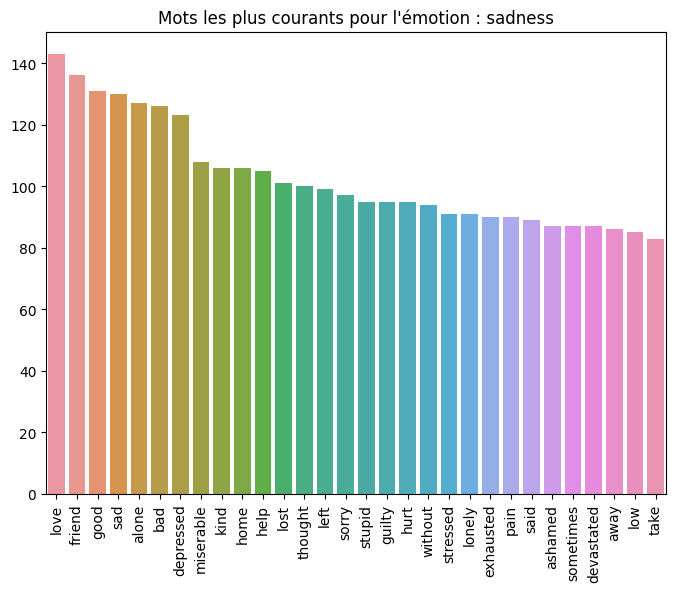

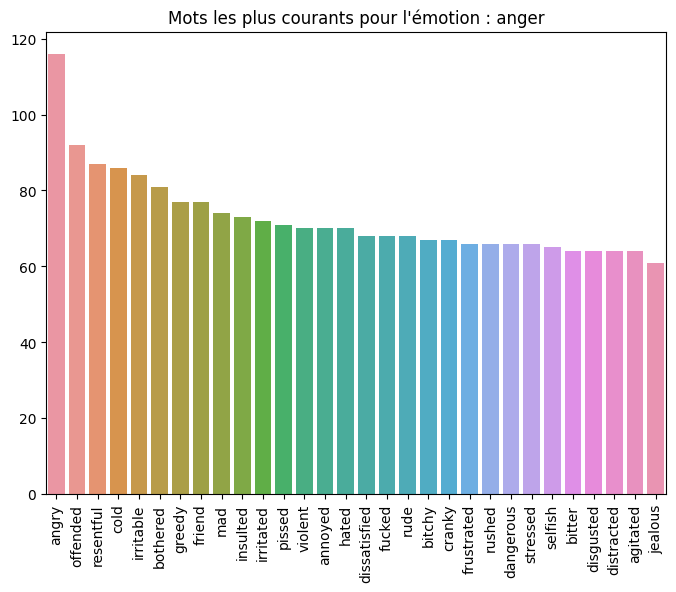

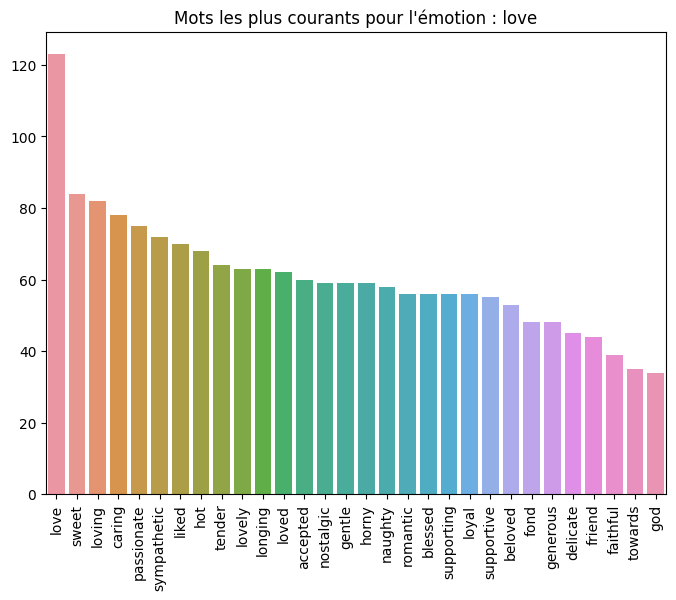

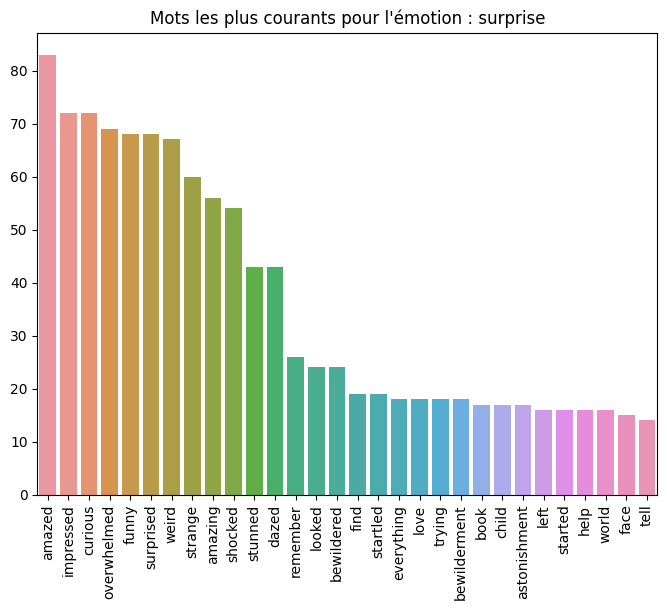

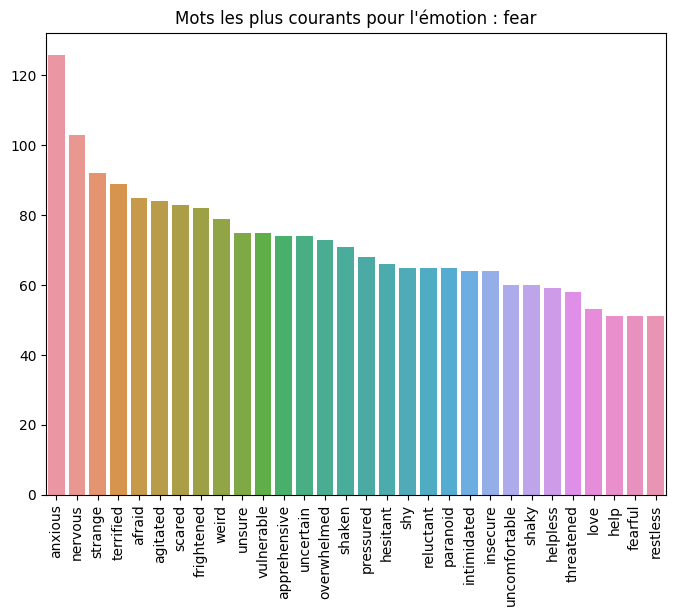

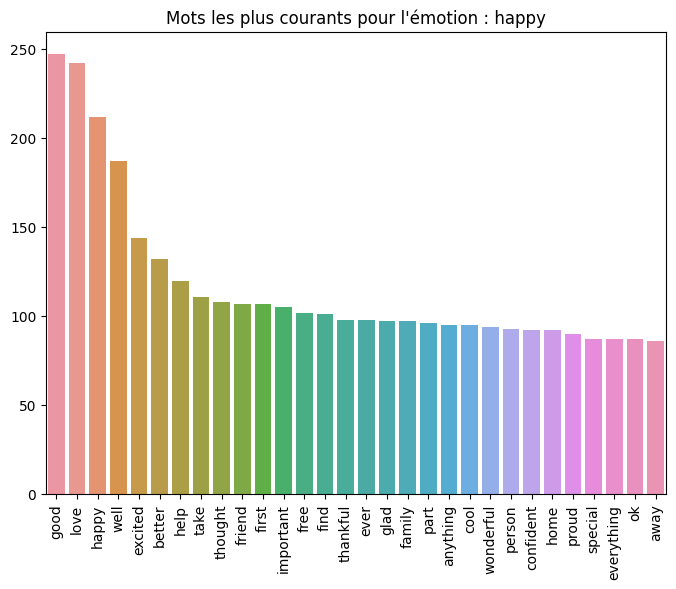

In [61]:
for emotion, top_words in top_words_by_emotion.items():
    word_freqs = [emotion_word_freqs[emotion][word] for word in top_words]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_words, y=word_freqs)
    plt.title(f"Mots les plus courants pour l'émotion : {emotion}")
    plt.xticks(rotation=90)

2.2.2 Matrice de similarité

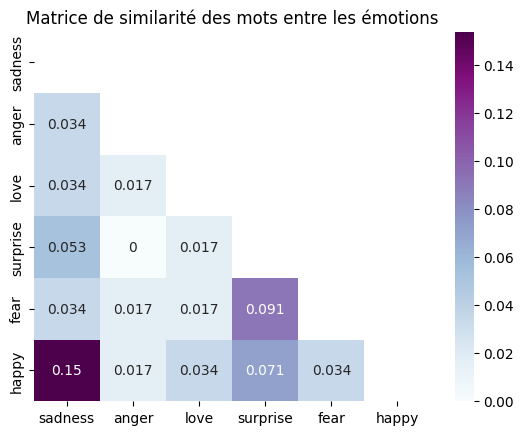

In [42]:
emotions = df['Emotion'].unique()
similarity_matrix = np.zeros((len(emotions), len(emotions)))

for i in range(len(emotions)): # Calcul de la mesure de similarité entre les listes de mots 
    for j in range(len(emotions)):
        emotion1 = emotions[i]
        emotion2 = emotions[j]
        words1 = words_by_emotion[emotion1]
        words2 = words_by_emotion[emotion2]
        similarity = len(set(words1) & set(words2)) / len(set(words1) | set(words2))
        similarity_matrix[i, j] = similarity

mask = np.triu(np.ones_like(similarity_matrix)) #masque diagonal

sns.heatmap( ## HEATMAP
    similarity_matrix, annot=True, mask=mask, cmap='BuPu', xticklabels=emotions, yticklabels=emotions)

plt.title('Matrice de similarité des mots entre les émotions') # Étiquettes et titre

plt.show()